<a href="https://colab.research.google.com/github/rozario-lamperouge/Quantum-Computing/blob/master/QuantumComputing_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Teleportation
  Quantum teleportation is a process in which quantum information (e.g. the exact state of an atom or photon) can be transmitted (exactly, in principle) from one location to another, with the help of classical communication and previously shared quantum entanglement between the sending and receiving location.

![alt text](https://i.ytimg.com/vi/dAaHHGHuy1c/maxresdefault.jpg)

  Although the name is inspired by the teleportation commonly used in fiction, quantum teleportation is limited to the transfer of information rather than matter itself. Quantum teleportation is not a form of transportation, but of communication: it provides a way of immediately transferring a qubit from one location to another without having to move a physical particle along with it.

 ## 1. Overview 
Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state  |ψ⟩=α|0⟩+β|1⟩ . This entails passing on information about  α  and  β  to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of  |ψ⟩  and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state  |ψ⟩  to Bob. We call this teleportation as at the end Bob will have  |ψ⟩  and Alice won't anymore.

## 2. The Quantum Teleportation Protocol 
To transfer a quantum bit, Alice and Bob must use a third party (Eve) to send them an entangled qubit pair. Alice them performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.
  ![alt text](https://qiskit.org/textbook/ch-algorithms/images/tele1.png)

In [ ]:
!pip install qiskit
!pip install matplotlib

In [2]:
import qiskit as q
%matplotlib inline

In [12]:
circuit = q.QuantumCircuit(3,3)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c_0: 
     
c_1: 
     
c_2:

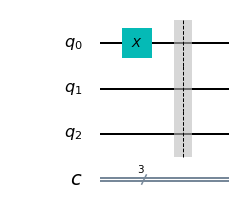

In [13]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

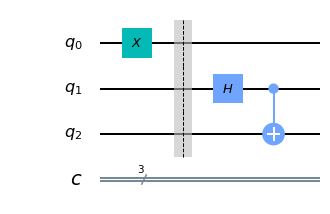

In [5]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

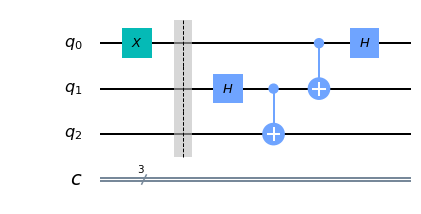

In [6]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

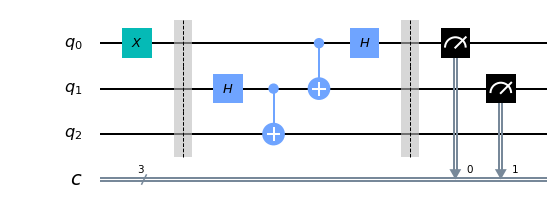

In [7]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

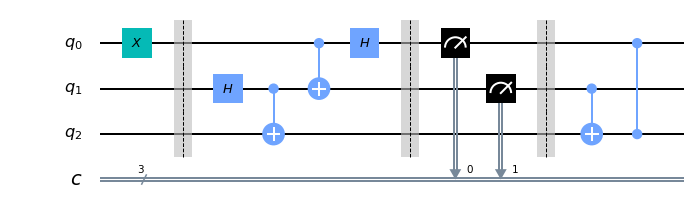

In [8]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

In [9]:
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

q_sim = q.Aer.get_backend('qasm_simulator')
q_job = q.execute(circuit, backend=q_sim, shots=1024).result()
counts = q_job.get_counts()
    
s_sim = q.Aer.get_backend('statevector_simulator')
s_job = q.execute(circuit, backend=s_sim).result()
statevec = s_job.get_statevector()

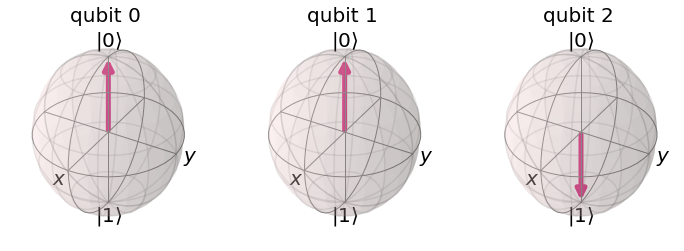

In [11]:
plot_bloch_multivector(statevec)